In [2]:
setwd('/import/DB/fel/BJTC-204')

In [3]:
sce = readRDS('male.sc.rds')

In [4]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [5]:
Idents(sce) = 'celltype'

In [6]:
DefaultAssay(sce) = 'RNA'

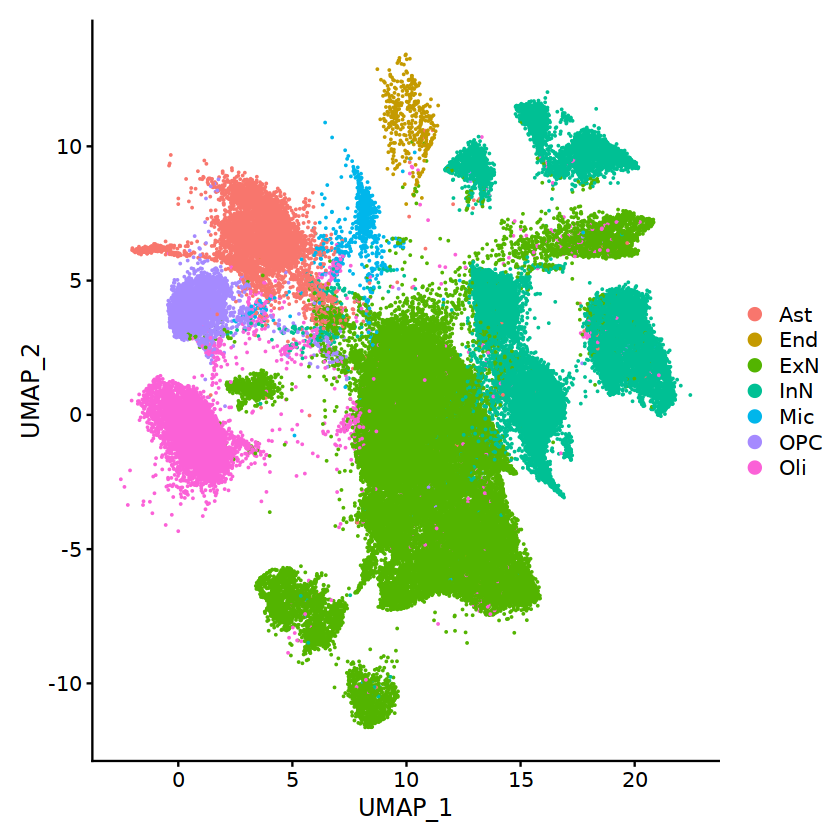

In [7]:
DimPlot(sce)

In [8]:
cells = unique(sce$celltype)

In [10]:
sce$group = sce$Condition

In [26]:
table(sce$group)


   Case Control 
  42914   35065 

In [35]:
l <- data.frame()

In [36]:
for (i in cells){
    Idents(sce) = 'celltype'
    cell = subset(sce,idents = i)
    DefaultAssay(cell) = 'RNA'
    Idents(cell) = 'group'
    diffgene = FindMarkers(cell,ident.1 = 'Case',logfc.threshold = 0.1)
    diffgene$celltype = i
    l <- rbind(l, diffgene)
}

In [37]:
table(l$celltype)


Ast End ExN InN Mic OPC Oli 
752 984 377 195 853 127 273 

In [38]:
write.csv(l,file = 'count.gene.csv')

In [39]:
library(Augur)

In [40]:
sc = sce

In [41]:
sc$cell_type = sc$celltype
sc$label = sc$group

In [42]:
augur = calculate_auc(sc,n_threads = 8)

using default assay: RNA ...



In [48]:
ss1 = augur$AUC

In [52]:
ss = data.frame(table(l$celltype))

In [53]:
colnames(ss) = c('cell_type','Number_of_Gene')

In [54]:
circ2 = merge(ss,ss1,by = 'cell_type')

In [55]:
colnames(circ2)

[1] "cell_type"      "Number_of_Gene" "auc"

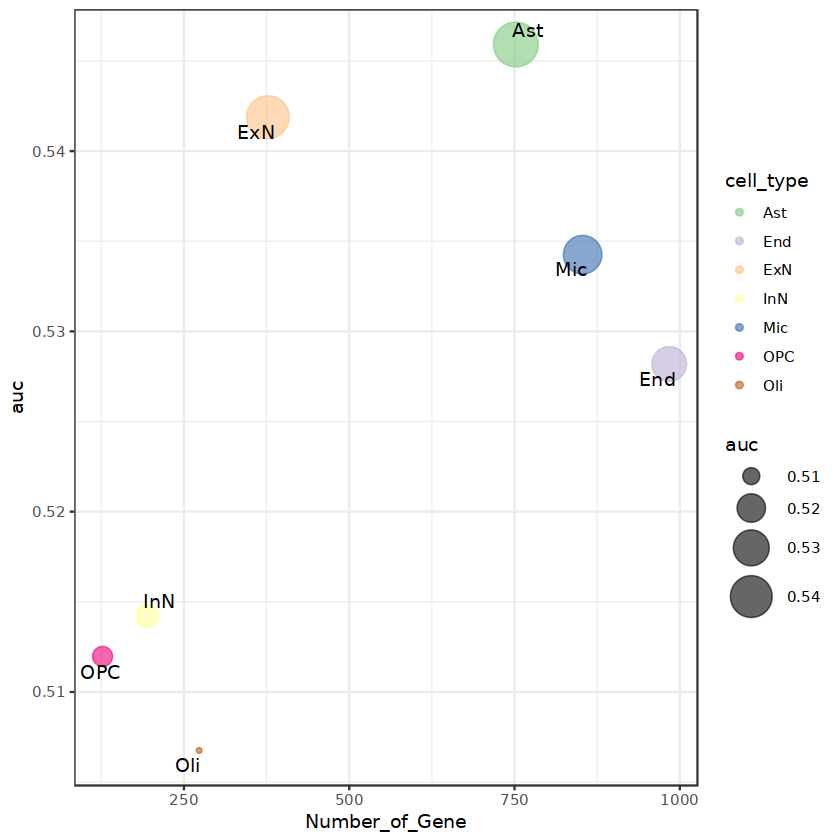

In [61]:
library(ggplot2)
library(RColorBrewer)
library(ggrepel)

ggplot(circ2,aes(x=Number_of_Gene,y= auc ))+
  geom_point(aes(size=auc,color=cell_type),alpha=0.6)+
  scale_size(range=c(1,12))+
  scale_color_brewer(palette = "Accent")+
  theme_bw()+
  theme(
    #legend.position = c("none")
  )+
  geom_text_repel(
    data = circ2,
    aes(label = cell_type),
    size = 4,
    segment.color = "black", show.legend = FALSE )